# Python for Data Science

## Lecture 5: Matplotlib

## Data visualization  

It is important to be able to present a set of data informatively for others (and it can help you as well).



In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import csv
# we will read data from csv files

# Matplotlib
- One of the best known plotting library in Python
- We will go through examples in order to understand how it works

# Squirrels of New York
The data is in a csv (comma separated values) file which is uploaded to the homepage. Every line represents a squirrel which has been spotted. Reviewing the first line gives you an idea of what data is collected for each detection.

long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,
combination_of_primary_and_highlight_color,color_notes,location,above_ground_sighter_measurement,specific_location,running,
chasing,climbing,eating,foraging,other_activities,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,
other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts

First, we create a function that can read a column from the csv file.

In [2]:
def getcolumn(filename, ind):      # Reading a column from the csv, maximum 3000 items 
    ans=[]
    c=0
    with open(filename, newline='') as csvfile:
        sqreader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in sqreader:
            if c!=0:
                ans.append(row[ind])
            c=c+1
            if c>3000:
                break
    return ans 

In [3]:
getcolumn('data/nyc_squirrels.csv',7)[0:10] # This will provide the first ten squirrel's age

['NA',
 'Adult',
 'Adult',
 'Juvenile',
 'NA',
 'Juvenile',
 'Adult',
 'NA',
 'Adult',
 'Adult']

In [4]:
a=getcolumn('data/nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)           # This will list the unique values
                                                            # and how many times they have occured

In [5]:
print(unique)
print(counts)

['?' 'Adult' 'Juvenile' 'NA']
[   4 2551  327  118]


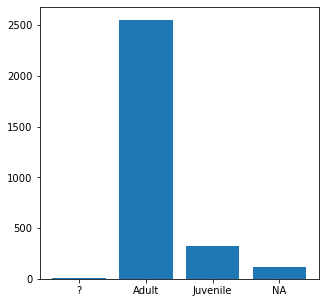

In [6]:
a=getcolumn('data/nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))   # number of graphs and size
axs.bar(unique,counts)
plt.show()

<img src="https://matplotlib.org/_images/anatomy.png" alt="Drawing" style="width: 400px;"/>

### Multiple plots next to each other
There are two approaches for Matplotlib. The recommended one is the object oriented approach, so we will use this too.

Inside one picture, there can be multiple figures which we call `axes`. (Do not confuse with `axis`!) Plotting works for the ax which we set in the command.

(The other approach is to always use the plt.command format for plotting, and then we would need to use a separate command to choose the figure).

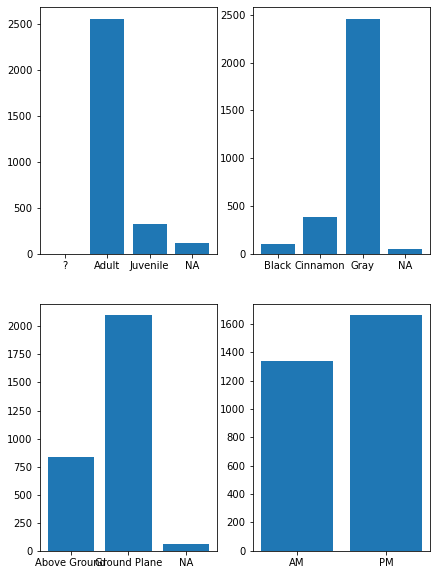

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(7, 10))

a=getcolumn('data/nyc_squirrels.csv',7)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[0, 0].bar(unique,counts)

a=getcolumn('data/nyc_squirrels.csv',8)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[0, 1].bar(unique,counts)

a=getcolumn('data/nyc_squirrels.csv',12)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[1, 0].bar(unique,counts)

a=getcolumn('data/nyc_squirrels.csv',4)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
axs[1, 1].bar(unique,counts)


plt.show()

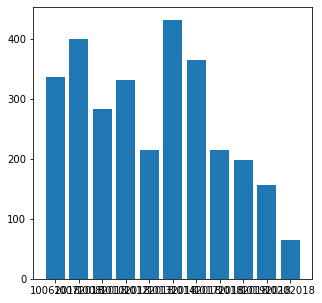

In [8]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts)
plt.show()

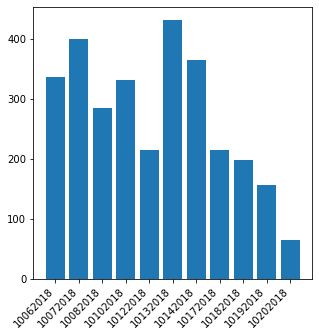

In [9]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
plt.show()



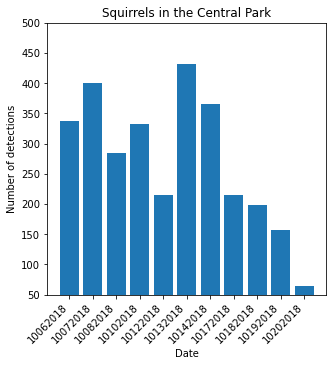

In [10]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Number of detections', xlabel='Date',
       title='Squirrels in the Central Park')
plt.show()


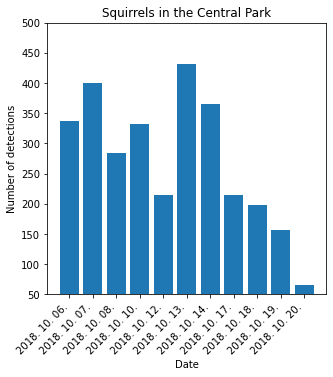

In [11]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Number of detections', xlabel='Date',
       title='Squirrels in the Central Park')
plt.show()


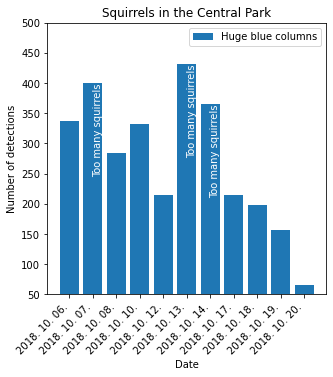

In [12]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts,label="Huge blue columns")
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Number of detections', xlabel='Date',
       title='Squirrels in the Central Park')

for group in [1,6,5]:
    axs.text( group, counts[group], "Too many squirrels", fontsize=10,
            verticalalignment="top", rotation=90,color="white")
axs.legend()
plt.show()



# Pie charts

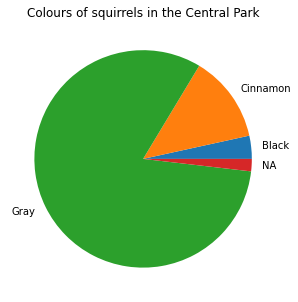

In [12]:
a=getcolumn('data/nyc_squirrels.csv',8)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.pie(counts,labels=unique)
axs.set(title='Colours of squirrels in the Central Park')
plt.show()



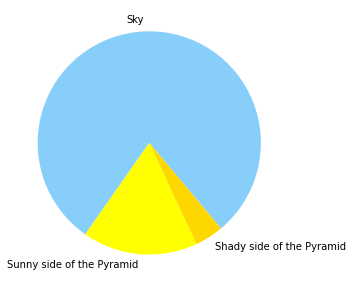

In [14]:
fig,ax = plt.subplots(1,1,figsize = (5,5))
ax.axis('equal')
langs = ['Sky', 'Sunny side of the Pyramid', 'Shady side of the Pyramid']
nums = [285/360,60/360,15/360]
colors=["lightskyblue","yellow","gold"]
ax.pie(nums, labels = langs, colors=colors,startangle=-50)
plt.show()

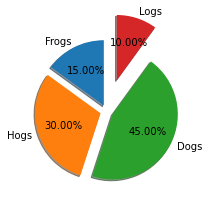

In [15]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
explode = (0.1, 0.1, 0.1, 0.5)  # Amount of explosion

fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.show()

## Function plotting

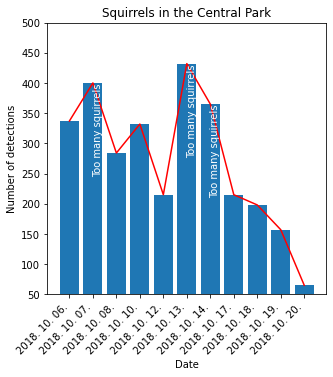

In [13]:
a=getcolumn('data/nyc_squirrels.csv',5)
num=np.array(a)
unique, counts = np.unique(num, return_counts=True)
unique=[l[4:8]+". "+l[0:2]+". "+l[2:4]+"." for l in unique]

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.bar(unique,counts)
labels = axs.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
axs.set(ylim=[50, 500], ylabel='Number of detections', xlabel='Date',
       title='Squirrels in the Central Park')

for group in [1,6,5]:
    axs.text( group, counts[group], "Too many squirrels", fontsize=10,
            verticalalignment="top", rotation=90,color="white")
axs.plot(counts,color="red")
plt.show()

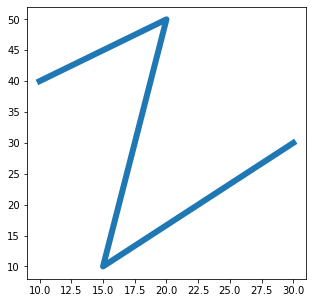

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

plt.plot([10,20,15,30], [40,50,10,30], lw=6)

plt.show()

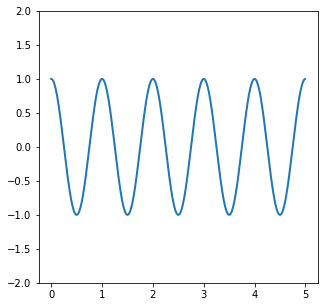

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
plt.plot(t, s, lw=2)

plt.ylim(-2, 2)
plt.show()

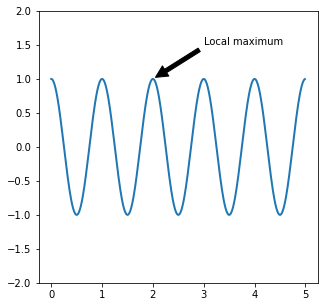

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

axs.annotate('Local maximum', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

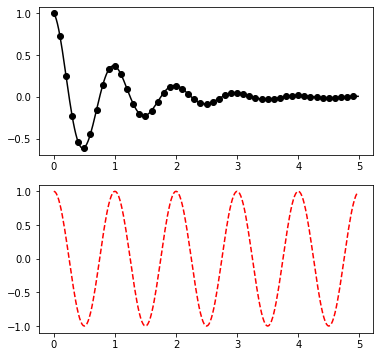

In [20]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig, axs = plt.subplots(2, 1, figsize=(6, 6))
axs[0].plot(t1, f(t1), 'ko')
axs[0].plot( t2, f(t2), 'k')
axs[1].plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Scatter plot
This plots points based on two arrays, one for the x-coordinates and one for the y-coordinates.

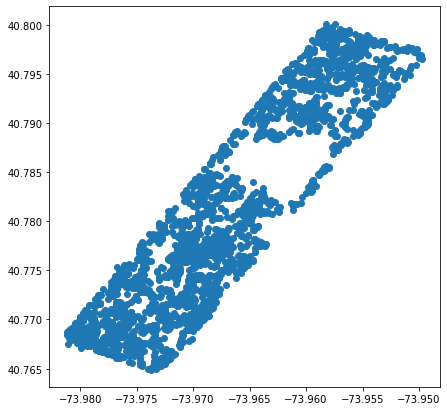

In [14]:
xpos=getcolumn('data/nyc_squirrels.csv',0)
ypos=getcolumn('data/nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.scatter(xpos,ypos)
plt.show()

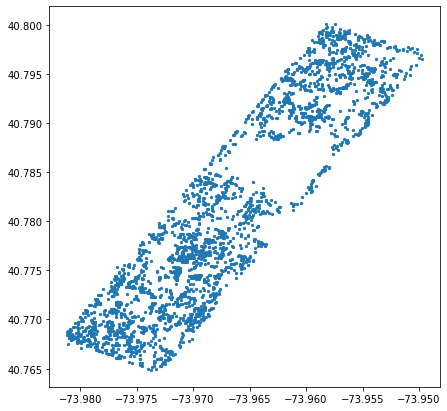

In [15]:
xpos=getcolumn('data/nyc_squirrels.csv',0)
ypos=getcolumn('data/nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.scatter(xpos,ypos,s=5)
plt.show()

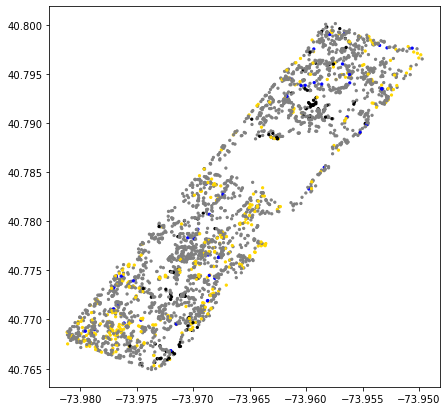

In [16]:
xpos=getcolumn('data/nyc_squirrels.csv',0)
ypos=getcolumn('data/nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

col=getcolumn('data/nyc_squirrels.csv',8)
def colorpicker(c):
    if c=='Gray': return "gray"
    if c=='Cinnamon': return "gold"
    if c=='Black': return "black"
    return 'blue'
    
colors=[colorpicker(a) for a in col]

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.scatter(xpos,ypos,s=5,c=colors)
plt.show()

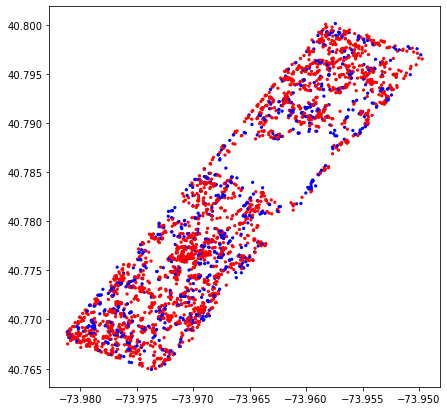

In [17]:
xpos=getcolumn('data/nyc_squirrels.csv',0)
ypos=getcolumn('data/nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

col=getcolumn('data/nyc_squirrels.csv',12)
def colorpicker(c):
    if c=='Above Ground': return "blue"
    return 'red'
    
colors=[colorpicker(a) for a in col]

fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.scatter(xpos,ypos,s=5,c=colors)
plt.show()

## Additional information: maps


In [25]:
import folium      # This is one of the many map tools available

In [ ]:
xpos=getcolumn('data/nyc_squirrels.csv',0)
ypos=getcolumn('data/nyc_squirrels.csv',1)
xpos=np.array([float(a) for a in xpos])
ypos=np.array([float(a) for a in ypos])

coords=list(zip(ypos,xpos))

# Coordinates of New York
NYC_COORD = [40.7828, -73.970]

# Creating a map
map_nyc = folium.Map(location=NYC_COORD, zoom_start=13,  width=640, height=480)

# Using comprehension to plot the points onto the map
[folium.CircleMarker(coords[i], radius=1,
                color='#0080bb', fill_color='#0080bb').add_to(map_nyc) 
for i in range(len(coords))]

# Show map
map_nyc


## Histogram

The `party.csv` contains data of silence nuisances in New York

In [19]:
hour=getcolumn('data/party.csv',0)


In [20]:
hour[0:10]

['2015-12-31 00:01:15',
 '2015-12-31 00:02:48',
 '2015-12-31 00:03:25',
 '2015-12-31 00:03:26',
 '2015-12-31 00:05:10',
 '2015-12-31 00:08:05',
 '2015-12-31 00:11:40',
 '2015-12-31 00:12:13',
 '2015-12-31 00:12:37',
 '2015-12-31 00:14:13']

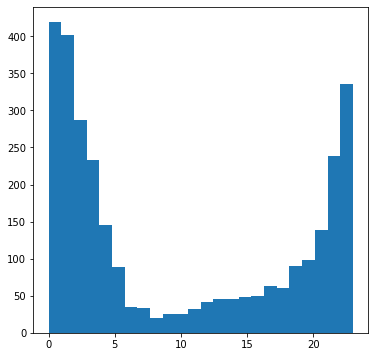

In [21]:
hour=getcolumn('data/party.csv',0)
hour=[ int(row[11])*10+int(row[12]) for row in hour]
fig, axs = plt.subplots(1, 1, figsize=(6,6))
plt.hist(hour,bins=24)
plt.show()

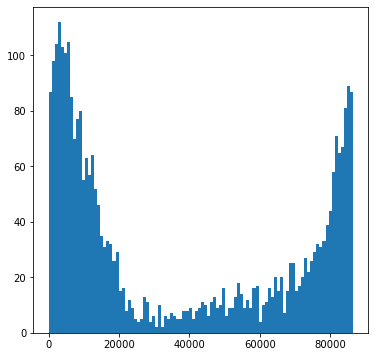

In [22]:
hour=getcolumn('data/party.csv',0)
hour=[ (int(row[11])*10+int(row[12]))*3600+(int(row[14])*10+int(row[15]))*60+int(row[17])*10+int(row[18]) for row in hour]
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.hist(hour,bins=100)
plt.show()

In [31]:
xpos=getcolumn('data/party.csv',6)
ypos=getcolumn('data/party.csv',7)

xpos=np.array([float(a) for a in xpos if len(a)>0])
ypos=np.array([float(a) for a in ypos if len(a)>0])

NYC_COORD = [40.7128, -74.0059]

coords=list(zip(xpos,ypos))

map_nyc = folium.Map(location=NYC_COORD, zoom_start=12, 
 width=640, height=480)

[folium.CircleMarker(coords[i], radius=1,
                color='#0080bb', fill_color='#0080bb').add_to(map_nyc) 
for i in range(len(coords))]

map_nyc

In [32]:
xposbar=getcolumn('data/bar_locations.csv',4)
yposbar=getcolumn('data/bar_locations.csv',5)
xposbar=np.array([float(a) for a in xposbar if len(a)>0])
yposbar=np.array([float(a) for a in yposbar if len(a)>0])
coordsbar=list(zip(xposbar,yposbar))

xpos=getcolumn('data/party.csv',6)
ypos=getcolumn('data/party.csv',7)
xpos=np.array([float(a) for a in xpos if len(a)>0])
ypos=np.array([float(a) for a in ypos if len(a)>0])
coords=list(zip(xpos,ypos))

NYC_COORD = [40.7128, -74.0059]

map_nyc = folium.Map(location=NYC_COORD, zoom_start=12, width=640, height=480)

[folium.CircleMarker(coordsbar[i], radius=1,
                color='#00ff00', fill_color='#00ff00').add_to(map_nyc) 
for i in range(len(coordsbar))]

[folium.CircleMarker(coords[i], radius=1,
                color='#ff0000', fill_color='#ff0000').add_to(map_nyc) 
for i in range(len(coords))]


map_nyc

## Plotting a picture based on arrays

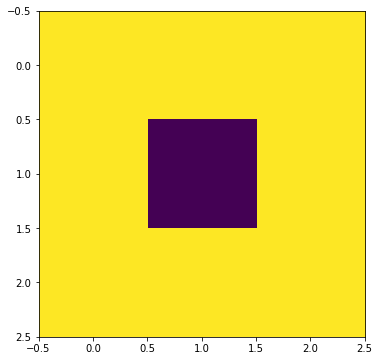

In [33]:
# A more advanced labyrinth printer
def printmaze(image):
    fig = plt.figure(figsize = (6,6))  
    ax = fig.add_subplot(111)
    ax.imshow(image)
    plt.show()
printmaze(np.array([[1,1,1],[1,0,1],[1,1,1]]))                

In [34]:
#Labyrinth
def makemaze(w=16,h=8):
    maze=np.ones((2*w+1,2*h+1))
    vis=np.zeros((2*w+1,2*h+1))
 
    def walk(x, y):
        vis[x][y] = 1
        maze[x,y]=0
          
        d = [(x - 2, y), (x, y + 2), (x + 2, y), (x, y - 2)]
        rn.shuffle(d)
        
        for (xx, yy) in d:
            if (not xx in range(2*w+1)) or (not yy in range(2*h+1)) or vis[xx][yy]: 
                continue
            if xx == x: 
                maze[x][max(y, yy)-1] = 0
            if yy == y: 
                maze[max(x, xx)-1][y] = 0
            walk(xx, yy)
 
    walk(2*rn.randrange(w)+1, 2*rn.randrange(h)+1)
 
    return maze


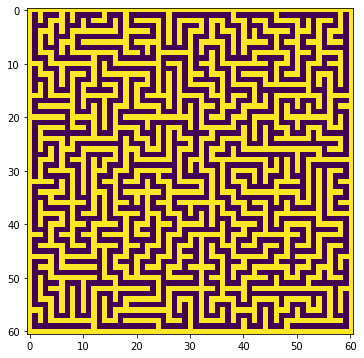

In [35]:
printmaze(makemaze(30,30))

### Save as image
`plt.savefig("name.png")`

# Examples

### More examples: https://matplotlib.org/gallery/index.html

In [36]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y


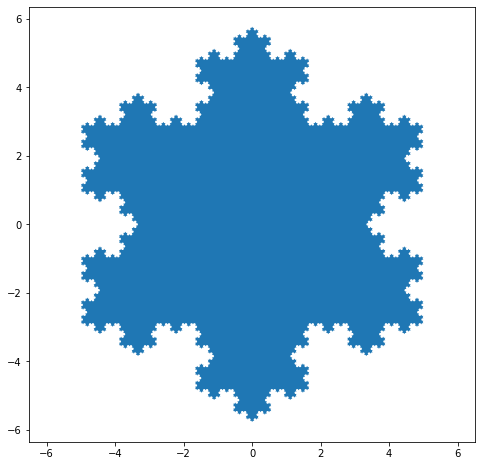

In [37]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

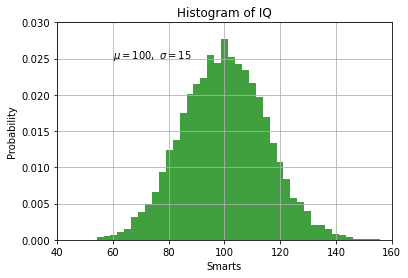

In [38]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

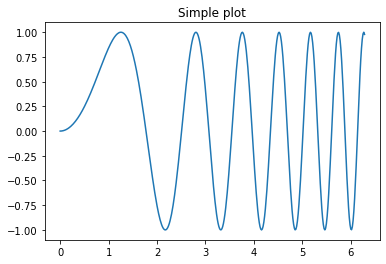

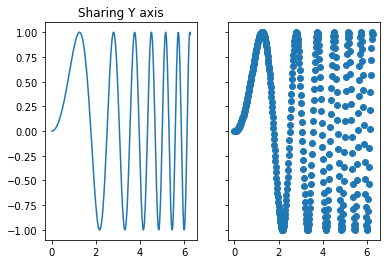

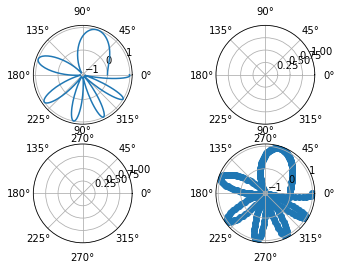

In [39]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)




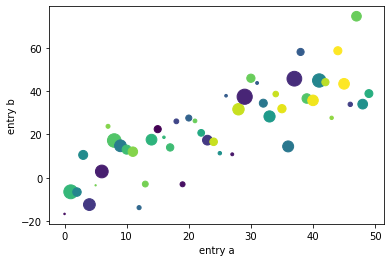

In [40]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

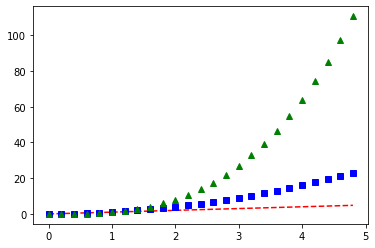

In [41]:
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()